## 1.4 Pandas

[Pandas](http://pandas.pydata.org/), written by Wes McKinney and others, is a powerful module that you can think of as _Excel for Python_.

Throughout this section, we'll be closely following the presentation in Wes McKinney's book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).  I can't recommend this book enough!  I've added context to give you a solid understanding of Pandas, as well as exercises to pace the lesson and give you an opportunity to experiment.

**Warning:**  Learning to use Pandas well takes time and practice.  There are no shortcuts :-(

First, like `numpy`, most people import `pandas` with the shorthand `pd`.  Its two key data structures, `Series` and `DataFrame`, are so common that people tend to import them directly as well:

In [1]:
from pandas import Series, DataFrame
import pandas as pd

#### Series

A `Series` is like a NumPy array, but with a set of element labels, called an _index_.  Think of it as a single column in a spreadsheet.

In [2]:
obj = Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

By default, the index is just the set of numbers $0, 1, \ldots, N-1$, so you can access the rows in a series like an array:

In [3]:
obj[1]

7

You can also grab the underlying values and index directly:

In [4]:
obj.values

array([ 4,  7, -5,  3])

In [5]:
obj.index

Int64Index([0, 1, 2, 3], dtype='int64')

You can create a series with a different index as follows:

In [6]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

Now you can use that index label to get one or more rows in the series:

In [7]:
obj2['d']

4

In [8]:
obj2[['a', 'c']]  # Get more than one row

a   -5
c    3
dtype: int64

In [9]:
# Series have a defined ordering
obj2[['c', 'a']]

c    3
a   -5
dtype: int64

Like a NumPy array, you can perform element-wise operations and filtering on Series, but unlike NumPy, these operations preserve the indices:

In [10]:
obj2[obj2 > 2]

d    4
b    7
c    3
dtype: int64

In [11]:
obj2 + 1

d    5
b    8
a   -4
c    4
dtype: int64

Series can also be thought of as "ordered dictionaries".  In fact, you can create a series from a dictionary:

In [12]:
country_pops = {
    'Belgium':     11259000,
    'Netherlands': 16933000,
    'Luxembourg':    570000,
    'France':      67063000,
    'Germany':     81276000,
}
obj3 = Series(country_pops)
obj3

Belgium        11259000
France         67063000
Germany        81276000
Luxembourg       570000
Netherlands    16933000
dtype: int64

By default, all the keys in the dictionary are included, in sorted order.  You can be more specific by specifying the index explicitly:

In [13]:
obj4 = Series(country_pops, index=['Belgium', 'Netherlands', 'Spain'])
obj4

Belgium        11259000
Netherlands    16933000
Spain               NaN
dtype: float64

Note that because there was no value for `'Spain'` in `country_pops`, the value in the series is `NaN` (Not-a-Number).  This is Pandas' standard way of representing **missing data**.  You can see if each element in a series was missing data with the `isnull` and `notnull` methods:

In [14]:
obj4.isnull()

Belgium        False
Netherlands    False
Spain           True
dtype: bool

In [15]:
obj4.notnull()

Belgium         True
Netherlands     True
Spain          False
dtype: bool

Vector operations between `Series` align along the index labels, not along the row numbers, which can be very useful:

In [16]:
obj3

Belgium        11259000
France         67063000
Germany        81276000
Luxembourg       570000
Netherlands    16933000
dtype: int64

In [17]:
obj4

Belgium        11259000
Netherlands    16933000
Spain               NaN
dtype: float64

In [18]:
obj3 + obj4

Belgium        22518000
France              NaN
Germany             NaN
Luxembourg          NaN
Netherlands    33866000
Spain               NaN
dtype: float64

You can assign names to both the `Series` itself and the `index`.  Think of these as column names in a spreasheet:

In [19]:
obj4.name = 'population'
obj4.index.name = 'country'
obj4

country
Belgium        11259000
Netherlands    16933000
Spain               NaN
Name: population, dtype: float64

**Ex 1.4.1 Starting from a dictionary, build a `Series` to represent the population of Belgium broken down by province.  Give both the series and the index a proper name.  From that `Series`, use indexing to sort the `Series` by number of customers.**  
Note: We'll see how to sort `Series` easily later.  For now, use explicit indexing.

#### DataFrame

A `DataFrame` is the 2D analog to the 1D `Series` object.  Think of it as a spreadsheet.  You have a set of columns (each of a single, fixed type).  Both the columns and the rows have an index as well.

A common way to create a `DataFrame` is with two nested dictionaries:

In [20]:
# From https://en.wikipedia.org/wiki/List_of_regions_by_past_GDP_%28PPP%29_per_capita
data = {
    'country': ['BE', 'BE', 'BE', 'NL', 'NL', 'NL'],
    'year': [1913, 1950, 2003, 1913, 1950, 2003],
    'gdp_per_capita': [4220, 5462, 21205, 4049, 5996, 21480]
}
frame = DataFrame(data)
frame

,country,gdp_per_capita,year
0,BE,4220,1913
1,BE,5462,1950
2,BE,21205,2003
3,NL,4049,1913
4,NL,5996,1950
5,NL,21480,2003


Notice that IPython has special support for rendering `DataFrame`s

We can reorder the columns as we wish and give the rows some other index:

In [21]:
DataFrame(data,
          columns=['year', 'country', 'gdp_per_capita'],
          index=['one', 'two', 'three', 'four', 'five', 'six'])

,year,country,gdp_per_capita
one,1913,BE,4220
two,1950,BE,5462
three,2003,BE,21205
four,1913,NL,4049
five,1950,NL,5996
six,2003,NL,21480


As with Series' any columns you specify not in the dictionary are filled with missing values:

In [22]:
frame2 = DataFrame(data,
                   columns=['year', 'country', 'gdp_per_capita', 'beer_quality'],
                   index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,country,gdp_per_capita,beer_quality
one,1913,BE,4220,NaN
two,1950,BE,5462,NaN
three,2003,BE,21205,NaN
four,1913,NL,4049,NaN
five,1950,NL,5996,NaN
six,2003,NL,21480,NaN


As with Series and their indices, we can get at the underlying data in a DataFrame:

In [23]:
frame2.columns

Index([u'year', u'country', u'gdp_per_capita', u'beer_quality'], dtype='object')

In [24]:
frame2.index

Index([u'one', u'two', u'three', u'four', u'five', u'six'], dtype='object')

In [25]:
frame2.values

array([[1913, 'BE', 4220, nan],
       [1950, 'BE', 5462, nan],
       [2003, 'BE', 21205, nan],
       [1913, 'NL', 4049, nan],
       [1950, 'NL', 5996, nan],
       [2003, 'NL', 21480, nan]], dtype=object)

You can select out one column from a DataFrame, either like a dictionary or (thanks to some Python magic) as if it was an attribute of a DataFrame:

In [26]:
frame2['year']

one      1913
two      1950
three    2003
four     1913
five     1950
six      2003
Name: year, dtype: int64

In [27]:
frame2.country

one      BE
two      BE
three    BE
four     NL
five     NL
six      NL
Name: country, dtype: object

Note how a column in a DataFrame is represented as a Series, with an appropriate index and name.

**Ex 1.4.2 Build a DataFrame that captures how the population in each  province of Flanders changed in the years 2013, 2014 and 2015.**

You can index rows with the `.ix[]` notation as follows:

In [28]:
frame2.ix['one']    # Single row, returned as a Series

year              1913
country             BE
gdp_per_capita    4220
beer_quality       NaN
Name: one, dtype: object

In [29]:
frame2.ix[['one', 'two']]  # Multiple rows, returned as a DataFrame

,year,country,gdp_per_capita,beer_quality
one,1913,BE,4220,NaN
two,1950,BE,5462,NaN


You can use slicing notation, but unlike lists and NumPy arrays, DataFrame slices have an **inclusive** endpoint:

In [30]:
frame2['one':'three']

,year,country,gdp_per_capita,beer_quality
one,1913,BE,4220,NaN
two,1950,BE,5462,NaN
three,2003,BE,21205,NaN


You can also select only some of the columns:

In [31]:
frame2.ix[['one', 'two'], ['year', 'country', 'gdp_per_capita']]

,year,country,gdp_per_capita
one,1913,BE,4220
two,1950,BE,5462


It might be easier to `drop` certain rows or columns instead of selecting the complement:

In [32]:
frame2.drop(['one', 'three'])  # Returns a copy with rows removed

,year,country,gdp_per_capita,beer_quality
two,1950,BE,5462,NaN
four,1913,NL,4049,NaN
five,1950,NL,5996,NaN
six,2003,NL,21480,NaN


In [33]:
frame2.drop('year', axis=1)  # Returns a copy with columns removed

,country,gdp_per_capita,beer_quality
one,BE,4220,NaN
two,BE,5462,NaN
three,BE,21205,NaN
four,NL,4049,NaN
five,NL,5996,NaN
six,NL,21480,NaN


We can modify columns in a frame: either set them to the same value, or specify a list of values, one for each row:

In [34]:
frame2.beer_quality = 10.0
frame2

,year,country,gdp_per_capita,beer_quality
one,1913,BE,4220,10
two,1950,BE,5462,10
three,2003,BE,21205,10
four,1913,NL,4049,10
five,1950,NL,5996,10
six,2003,NL,21480,10


In [35]:
# Not quite right...
frame2.beer_quality = [10.0, 10.0, 10.0, 4.0, 3.0, 2.0]
frame2

,year,country,gdp_per_capita,beer_quality
one,1913,BE,4220,10
two,1950,BE,5462,10
three,2003,BE,21205,10
four,1913,NL,4049,4
five,1950,NL,5996,3
six,2003,NL,21480,2


You can also assign a Series to a column, in which case rows are matched by index and missing elements are set to `NaN`:

In [36]:
val = Series([10.0, 2.0, 1.0], index=['one', 'four', 'five'])
val

one     10
four     2
five     1
dtype: float64

In [37]:
frame2.beer_quality = val
frame2

,year,country,gdp_per_capita,beer_quality
one,1913,BE,4220,10
two,1950,BE,5462,NaN
three,2003,BE,21205,NaN
four,1913,NL,4049,2
five,1950,NL,5996,1
six,2003,NL,21480,NaN


You can create a new column by simply assigning something to it:

In [38]:
frame2['livable'] = (frame2.beer_quality >= 9.0)
# Can't do this though: frame2.livable = ...

frame2

,year,country,gdp_per_capita,beer_quality,livable
one,1913,BE,4220,10,True
two,1950,BE,5462,NaN,False
three,2003,BE,21205,NaN,False
four,1913,NL,4049,2,False
five,1950,NL,5996,1,False
six,2003,NL,21480,NaN,False


You can also delete columns in place with `del`:

In [39]:
del frame2['beer_quality']
frame2

,year,country,gdp_per_capita,livable
one,1913,BE,4220,True
two,1950,BE,5462,False
three,2003,BE,21205,False
four,1913,NL,4049,False
five,1950,NL,5996,False
six,2003,NL,21480,False


**Ex 1.4.3 Quick: what's the difference between `frame2.drop('beer_quality')` and `del frame2['beer_quality']`?**

You can also create a `DataFrame` using nested dictionaries.  The outer keys are the columns, the inner ones are the rows, and missing data is marked appropriately:

In [40]:
data = {
    'Belgium': {1913: 4220.0, 1950: 5462.0, 2003: 21205.0},
    'Netherlands': {1950: 5996.0, 1973: 13082.0, 2003: 21480.0}
}
frame3 = DataFrame(data)
frame3

,Belgium,Netherlands
1913,4220,NaN
1950,5462,5996
1973,NaN,13082
2003,21205,21480


Like with matrices, you can transpose a DataFrame:

In [41]:
frame3.T

,1913,1950,1973,2003
Belgium,4220,5462,NaN,21205
Netherlands,NaN,5996,13082,21480


It's good form to explicitly name the row and column indices:

In [42]:
frame3.index.name = 'year'
frame3.columns.name = 'country'
frame3

country,Belgium,Netherlands
year,,
1913,4220,NaN
1950,5462,5996
1973,NaN,13082
2003,21205,21480


**Ex 1.4.5 Let's get some practice with slicing and dicing data.  Given the following DataFrame, extract:**
1. **the first 2 rows**
2. **the second and third column**
3. **all rows where gdp_per_capita exceeds 5000**

```
data = {
    'year': [1913, 1950, 2003, 1913, 1950, 2003],
    'country': ['BE', 'BE', 'BE', 'NL', 'NL', 'NL'],
    'gdp_per_capita': [4220, 5462, 21205, 4049, 5996, 21480]
}
frame = DataFrame(data, columns=['year', 'country', 'gdp_per_capita'])
```

From now on, we'll quickly survey a few DataFrame operations, then work through a long and interesting example.

As with Series, arithmetic between DataFrames is defined and aligns over row and column indices.  For example:

In [43]:
import numpy as np
df1 = DataFrame(np.arange(9.).reshape((3,3)),
                columns=['b', 'c', 'd'],
                index=['Belgium', 'Netherlands', 'Luxembourg'])
df2 = DataFrame(np.arange(12.).reshape((4,3)),
                columns=['b', 'd', 'e'],
                index=['France', 'Belgium', 'Netherlands', 'Germany'])

In [44]:
df1 

,b,c,d
Belgium,0,1,2
Netherlands,3,4,5
Luxembourg,6,7,8


In [45]:
df2

,b,d,e
France,0,1,2
Belgium,3,4,5
Netherlands,6,7,8
Germany,9,10,11


In [46]:
df1 + df2

,b,c,d,e
Belgium,3,NaN,6,NaN
France,NaN,NaN,NaN,NaN
Germany,NaN,NaN,NaN,NaN
Luxembourg,NaN,NaN,NaN,NaN
Netherlands,9,NaN,12,NaN


Note that in places where either `df1` or `df2` was missing data, the result of `df1 + df2` will be missing as well.  We can instead tell `pandas` to assume some other value, like 0, if we use the `add` method:

In [47]:
df1

,b,c,d
Belgium,0,1,2
Netherlands,3,4,5
Luxembourg,6,7,8


In [48]:
df2

,b,d,e
France,0,1,2
Belgium,3,4,5
Netherlands,6,7,8
Germany,9,10,11


In [49]:
df1.add(df2, fill_value=0)

,b,c,d,e
Belgium,3,1,6,5
France,0,NaN,1,2
Germany,9,NaN,10,11
Luxembourg,6,7,8,NaN
Netherlands,9,4,12,8


Notice that there are still some entries for which data wasn't available in either `df1` or `df2`, and those are still marked as missing.

There are also analogous methods for `-` (`sub`), `*` (`mul`) and `/` (`div`).

You can also do arithmetic between DataFrames and Series.  `pandas` lines these up along the columns of the DataFrame, then uses the same Series for every row:

In [50]:
df = DataFrame({
        'BeerLovers': {'BE': 55, 'FR': 15},
        'WineLovers': {'BE': 10, 'FR': 30}
    })
df

,BeerLovers,WineLovers
BE,55,10
FR,15,30


In [51]:
df.ix['Total'] = df.ix['BE'] + df.ix['FR']
df

,BeerLovers,WineLovers
BE,55,10
FR,15,30
Total,70,40


In [52]:
df.astype(float) / df.ix['Total']  # Need to avoid integer division!

,BeerLovers,WineLovers
BE,0.785714,0.25
FR,0.214286,0.75
Total,1.000000,1.00


Perhaps that's a bit more natural in the other orientation.  We can specify an axis along which to replicate the series when using the explicit `div` method:

In [53]:
df = DataFrame({
        'BE': {'BeerLovers': 55, 'WineLovers': 10},
        'FR': {'BeerLovers': 15, 'WineLovers': 30}
    })
df

,BE,FR
BeerLovers,55,15
WineLovers,10,30


In [54]:
df['Total'] = df.BE + df.FR
df

,BE,FR,Total
BeerLovers,55,15,70
WineLovers,10,30,40


In [55]:
df2 = df.astype(float).div(df.Total, axis=0)
df2

,BE,FR,Total
BeerLovers,0.785714,0.214286,1
WineLovers,0.250000,0.750000,1


In [56]:
df2['Total']

BeerLovers    1
WineLovers    1
Name: Total, dtype: float64

Or maybe you want the proportions within each country:

In [57]:
print(df)
df2 = df.T
df2

            BE  FR  Total
BeerLovers  55  15     70
WineLovers  10  30     40


,BeerLovers,WineLovers
BE,55,10
FR,15,30
Total,70,40


In [58]:
df2['Total'] = df2.BeerLovers + df2.WineLovers
df2

,BeerLovers,WineLovers,Total
BE,55,10,65
FR,15,30,45
Total,70,40,110


In [59]:
df2.div(df2.Total, axis=0)

,BeerLovers,WineLovers,Total
BE,0.846154,0.153846,1
FR,0.333333,0.666667,1
Total,0.636364,0.363636,1


You can apply NumPy functions element by element to a DataFrame:

In [60]:
df = DataFrame(np.random.rand(3,4), columns=['a','b','c','d'])
df

,a,b,c,d
0,0.260945,0.644361,0.554564,0.632985
1,0.383714,0.674574,0.756515,0.595260
2,0.416512,0.526751,0.380712,0.967233


In [61]:
np.exp(df)

,a,b,c,d
0,1.298156,1.904770,1.741181,1.883224
1,1.467726,1.963197,2.130836,1.813502
2,1.516663,1.693421,1.463326,2.630655


Or you can apply a function to each row or column:

In [62]:
def dynamic_range(xs):
    return xs.max() - xs.min()

In [63]:
df.apply(dynamic_range)  # Apply it to a column

a    0.155568
b    0.147823
c    0.375802
d    0.371973
dtype: float64

In [64]:
df.apply(dynamic_range, axis=1) # Apply it to each row

0    0.383417
1    0.372800
2    0.586521
dtype: float64

Instead of collapsing the DataFrame to a Series, the applied function can itself return a Series:

In [65]:
def dynamic_range_2(xs):
    return Series([xs.max(), xs.min()], index=['min', 'max'])

In [66]:
df

,a,b,c,d
0,0.260945,0.644361,0.554564,0.632985
1,0.383714,0.674574,0.756515,0.595260
2,0.416512,0.526751,0.380712,0.967233


In [67]:
df.apply(dynamic_range_2)

,a,b,c,d
min,0.416512,0.674574,0.756515,0.967233
max,0.260945,0.526751,0.380712,0.595260


In [68]:
df.apply(dynamic_range_2, axis=1)

,min,max
0,0.644361,0.260945
1,0.756515,0.383714
2,0.967233,0.380712


There are a couple of predefined functions that are useful:

In [69]:
df

,a,b,c,d
0,0.260945,0.644361,0.554564,0.632985
1,0.383714,0.674574,0.756515,0.595260
2,0.416512,0.526751,0.380712,0.967233


In [70]:
df.sum()

a    1.061171
b    1.845687
c    1.691791
d    2.195478
dtype: float64

In [71]:
df.sum(axis=1)

0    2.092856
1    2.410063
2    2.291208
dtype: float64

In [72]:
df

,a,b,c,d
0,0.260945,0.644361,0.554564,0.632985
1,0.383714,0.674574,0.756515,0.595260
2,0.416512,0.526751,0.380712,0.967233


In [73]:
df.mean()

a    0.353724
b    0.615229
c    0.563930
d    0.731826
dtype: float64

In [74]:
df.cumsum()

,a,b,c,d
0,0.260945,0.644361,0.554564,0.632985
1,0.644659,1.318936,1.311078,1.228245
2,1.061171,1.845687,1.691791,2.195478


A particularly useful method for exploring data is `describe`:

In [75]:
df.describe()

,a,b,c,d
count,3.000000,3.000000,3.000000,3.000000
mean,0.353724,0.615229,0.563930,0.731826
std,0.082005,0.078099,0.188076,0.204739
min,0.260945,0.526751,0.380712,0.595260
25%,0.322329,0.585556,0.467638,0.614123
50%,0.383714,0.644361,0.554564,0.632985
75%,0.400113,0.659468,0.655539,0.800109
max,0.416512,0.674574,0.756515,0.967233


On non-numeric data, `describe` yields different results:

In [76]:
['a', 'b'] * 3

['a', 'b', 'a', 'b', 'a', 'b']

In [77]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

One final topic we'll touch on is how to read and write CSV files.  CSV files (or also TSV files) are the most common way of getting large amounts of data into and out of Pandas.

Let's create a CSV file in the current directory:

In [78]:
# We haven't discussed Python's functions for reading and writing
# text in files, but I hope these are self-explanatory
f = open('mysample.csv', 'w')
f.write(
"""Year,Belgium,Netherlands
1913,4220,4049
1950,5462,5996
2003,21205,21480
""")
f.close()

With the file in place, here's how we can read it into a DataFrame:

In [79]:
df = pd.read_csv('mysample.csv')
df

,Year,Belgium,Netherlands
0,1913,4220,4049
1,1950,5462,5996
2,2003,21205,21480


If you show the help for `read_csv`, you'll see it has a *ton* of options.  With the right options, you can read almost any CSV file out there into the exact DataFrame of your dreams..

Now let's save the data to a csv:

In [80]:
df.to_csv('mysample2.csv')

In [81]:
# Read out file and print it
for line in open('mysample2.csv', 'r'):
    print line.strip()

,Year,Belgium,Netherlands
0,1913,4220,4049
1,1950,5462,5996
2,2003,21205,21480


---

#### Extended demo

This demo closely follows the extended example in Wes McKinney's book that traces US baby names through the years.  We'll introduce lots of functionality "by osmosis".  The goal is that you can get an idea of what kinds of higher-order manipulations there exist in Pandas.

In the US, the equivalent to an ID number in the National Registry is called a _Social Security Number_.  Everyone is assigned one of these at birth (or immigration).  As a result, the Social Security Administration has a detailed record of the names of everyone born in the US over the last century:

http://www.ssa.gov/oact/babynames/limits.html

**Ex 1.4.6 Go to the website above and download the "National Data" set.  Extract the files into a folder "names" next to your IPython Notebook**

The names data set is provided as one CSV file per year.  Let's look at one of these files:

In [82]:
for line in open('names/yob2014.txt', 'r').readlines()[:10]:
    print line.strip()

Emma,F,20799
Olivia,F,19674
Sophia,F,18490
Isabella,F,16950
Ava,F,15586
Mia,F,13442
Emily,F,12562
Abigail,F,11985
Madison,F,10247
Charlotte,F,10048


OK, so the format is "name", "sex" and "count".  Let's read one of the files into a DataFrame:

In [83]:
names1880 = pd.read_csv('names/yob1880.txt',
                        names=['name', 'sex', 'births'])

In [84]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


Notice that IPython only shows the beginning and end of a long DataFrame.

Straight away, let's count how many men and women were born in 1880.  We'll use the `groupby` method:

In [85]:
# .sum() adds up the numbers in the 'births' column
# separately for each group
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

**Ex 1.4.7 How many different male and female names were used in 1880?**

We'd like to paste together all the names from all the years.  I'll do two years, then you'll do all the years as an exercise

The trick is that we can paste two DataFrames one after another using `pd.concat`.  If we just paste the frames directly, we'll lose the information about years because that was implicit in the filenames.  But we can add it to each data frame easily:

In [86]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])
names1880['year'] = 1880

names1881 = pd.read_csv('names/yob1881.txt', names=['name', 'sex', 'births'])
names1881['year'] = 1881

# We use ignore_index to create a new index column, instead of 
# pasting the indices from each smaller DataFrame
names = pd.concat([names1880, names1881], ignore_index=True)

In [87]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


**Ex 1.4.8 Write a function to read all names data from 1880 to 2014 into a single `DataFrame`.  Store the result in `names`**

In [88]:
# HERE'S THE SOLUTION TO THE EXERCISE!
#
# We need it to read in the `names` DataFrame, so we can
# use it throughout the rest of this notebook

# First, we'll write a function to read in one year
def read_one_year(year):
    df = pd.read_csv('names/yob{0}.txt'.format(year),
                     names=['name', 'sex', 'births'])
    df['year'] = int(year)
    return df

# Then use list comprehension to read all years in and concat them
names = pd.concat([read_one_year(y) for y in range(1880, 2014+1)],
                 ignore_index=False)

In [89]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


OK, we have all our data in memory.  Since `pandas` is basically `Excel for Python`, let's summarize the data with a Pivot Table:

In [90]:
total_births = names.pivot_table('births',
                                 index='year',
                                 columns='sex',
                                 aggfunc=sum)
total_births.tail()  # Show last rows only

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


We can plot this new DataFrame easily:

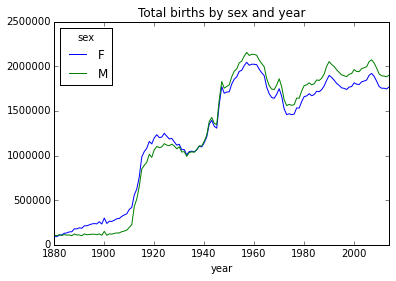

In [91]:
# Need '%matplotlib inline' magic here to integrate plots into IPython
%matplotlib inline
total_births.plot(title='Total births by sex and year')

We can convert raw numbers of births to proportions.  What we'll do is to group by 'year' and 'sex', and then for each group, divide the number of births for each name by the total number of births in that group.

In [92]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


So, for example, 7.8% of all girls born in 1880 were called 'Mary'.

**Ex 1.4.9 What percentage of _all_ babies were called 'Mary' in 1880?**

Let's check that the values of `prop` within each group add up to 1. 

In [93]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1
      M      1
1881  F      1
      M      1
1882  F      1
      M      1
1883  F      1
      M      1
1884  F      1
      M      1
1885  F      1
      M      1
1886  F      1
      M      1
1887  F      1
      M      1
1888  F      1
      M      1
1889  F      1
      M      1
1890  F      1
      M      1
1891  F      1
      M      1
1892  F      1
      M      1
1893  F      1
      M      1
1894  F      1
      M      1
            ..
2000  F      1
      M      1
2001  F      1
      M      1
2002  F      1
      M      1
2003  F      1
      M      1
2004  F      1
      M      1
2005  F      1
      M      1
2006  F      1
      M      1
2007  F      1
      M      1
2008  F      1
      M      1
2009  F      1
      M      1
2010  F      1
      M      1
2011  F      1
      M      1
2012  F      1
      M      1
2013  F      1
      M      1
2014  F      1
      M      1
Name: prop, dtype: float64

Let's reduce the data set by focusing on the top 1000 names for each sex/year combination:

In [94]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

top1000

name sex  births  year      prop
year sex                                             
1880 F   0           Mary   F    7065  1880  0.077643
         1           Anna   F    2604  1880  0.028618
         2           Emma   F    2003  1880  0.022013
         3      Elizabeth   F    1939  1880  0.021309
         4         Minnie   F    1746  1880  0.019188
         5       Margaret   F    1578  1880  0.017342
         6            Ida   F    1472  1880  0.016177
         7          Alice   F    1414  1880  0.015540
         8         Bertha   F    1320  1880  0.014507
         9          Sarah   F    1288  1880  0.014155
         10         Annie   F    1258  1880  0.013825
         11         Clara   F    1226  1880  0.013474
         12          Ella   F    1156  1880  0.012704
         13      Florence   F    1063  1880  0.011682
         14          Cora   F    1045  1880  0.011484
         15        Martha   F    1040  1880  0.011429
         16         Laura   F    1012  1880  0.011122
         17        Nellie   F     995  1880  0.010935
         18         Grace   F     982  1880  0.010792
         19        Carrie   F     949  1880  0.010429
         20         Maude   F     858  1880  0.009429
         21         Mabel   F     808  1880  0.008880
         22        Bessie   F     796  1880  0.008748
         23        Jennie   F     793  1880  0.008715
         24      Gertrude   F     787  1880  0.008649
         25         Julia   F     783  1880  0.008605
         26        Hattie   F     769  1880  0.008451
         27         Edith   F     768  1880  0.008440
         28        Mattie   F     704  1880  0.007737
         29          Rose   F     700  1880  0.007693
...                   ...  ..     ...   ...       ...
2014 M   20037      Dario   M     214  2014  0.000113
         20038       Kale   M     214  2014  0.000113
         20039  Broderick   M     213  2014  0.000112
         20040    Jayvion   M     213  2014  0.000112
         20041     Kaison   M     213  2014  0.000112
         20042       Koen   M     213  2014  0.000112
         20043     Magnus   M     213  2014  0.000112
         20046   Valentin   M     212  2014  0.000111
         20045     Teagan   M     212  2014  0.000111
         20044     Darien   M     212  2014  0.000111
         20047      Bodie   M     211  2014  0.000111
         20048    Brayson   M     211  2014  0.000111
         20049      Chace   M     211  2014  0.000111
         20050      Kylen   M     209  2014  0.000110
         20051     Yehuda   M     209  2014  0.000110
         20052    Bridger   M     208  2014  0.000109
         20053     Howard   M     208  2014  0.000109
         20054     Maddux   M     208  2014  0.000109
         20055    Osvaldo   M     208  2014  0.000109
         20056      Rocky   M     208  2014  0.000109
         20060       Jair   M     207  2014  0.000109
         20062      Tyree   M     207  2014  0.000109
         20061    Reyansh   M     207  2014  0.000109
         20059     Foster   M     207  2014  0.000109
         20058      Boden   M     207  2014  0.000109
         20057       Ayan   M     207  2014  0.000109
         20063        Ean   M     206  2014  0.000108
         20064       Leif   M     205  2014  0.000108
         20065     Reagan   M     205  2014  0.000108
         20066      Rylen   M     205  2014  0.000108

[269877 rows x 5 columns]

It might be hard to see what's going on.  Let's do this in a more pedestrian way.  It's possible to iterate through each of the groups generated by `groupby` with a for loop.  Let's look at a bit of the first three groups:

In [95]:
for key, group in list(names.groupby(['year', 'sex']))[:3]:
    print("")  # Empty line
    print(key)
    print(group.head())
    print("...")


(1880, 'F')
        name sex  births  year      prop
0       Mary   F    7065  1880  0.077643
1       Anna   F    2604  1880  0.028618
2       Emma   F    2003  1880  0.022013
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188
...

(1880, 'M')
        name sex  births  year      prop
942     John   M    9655  1880  0.087383
943  William   M    9532  1880  0.086269
944    James   M    5927  1880  0.053642
945  Charles   M    5348  1880  0.048402
946   George   M    5126  1880  0.046393
...

(1881, 'F')
        name sex  births  year      prop
0       Mary   F    6919  1881  0.075244
1       Anna   F    2698  1881  0.029341
2       Emma   F    2034  1881  0.022120
3  Elizabeth   F    1852  1881  0.020141
4   Margaret   F    1658  1881  0.018031
...


Aha!  We get a DataFrame with only the rows corresponding to each group, along with the group key.  So we can iterate through all the groups as follows:
```
for (year, sex), group in names.groupby(['year', 'sex']):
   ...
```

**Ex 1.4.10 Using a `for` loop and `pd.concat`, build up a the `top1000` DataFrame, i.e., a DataFrame with year, sex and births columns containing only the top 1000 names for each year/sex combination.**

Let's build a pivot table that counts births for each year/name combination.

In [96]:
total_births = top1000.pivot_table('births',
                                   index='year',
                                   columns='name',
                                  aggfunc=sum)
total_births.head()

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,...,13,31,NaN,NaN,14,6,8,58,27,NaN


We can plot a couple of the columns in this pivot table to see how naming trends have changed with time:

In [97]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

In [98]:
total_births.sum(axis=1)

year
1880     201194
1881     192699
1882     220903
1883     216530
1884     241959
1885     239339
1886     253252
1887     245350
1888     295750
1889     285552
1890     297278
1891     282737
1892     328717
1893     320035
1894     332649
1895     344016
1896     350269
1897     340269
1898     372861
1899     332399
1900     437621
1901     338083
1902     377190
1903     371547
1904     392482
1905     411909
1906     416445
1907     450850
1908     473146
1909     493927
         ...   
1985    3230187
1986    3208443
1987    3241422
1988    3303985
1989    3416768
1990    3496960
1991    3429951
1992    3364877
1993    3287621
1994    3229203
1995    3174774
1996    3145853
1997    3109261
1998    3134981
1999    3130657
2000    3176781
2001    3124323
2002    3107495
2003    3144498
2004    3132384
2005    3135412
2006    3195432
2007    3203550
2008    3129057
2009    3024194
2010    2918723
2011    2888231
2012    2880561
2013    2878181
2014    2918178
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1085e2ad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ac80690>], dtype=object)

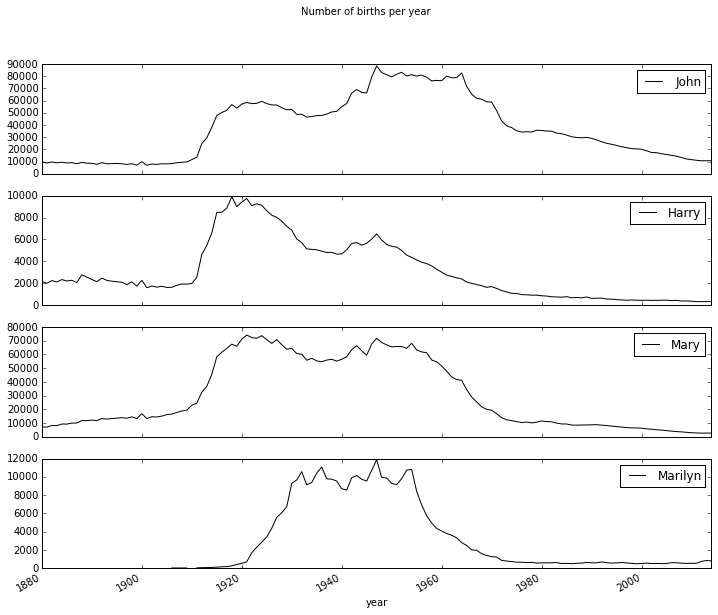

In [99]:
subset.plot(subplots=True, figsize=(12,10), grid=False,
           title="Number of births per year")

**Ex 1.4.11 Plot the proportion in each year of babies named John, Harry, Mary and Marilyn, all in one figure.**

Are these names dropping in popularity over time, or is the diversity of names going up with time?  Let's see what the data says...

One measure of diversity is the fraction of names accounted for by the top 1000 names every year.

In [100]:
table = top1000.pivot_table('prop',
                            index='year',columns='sex', aggfunc=sum)

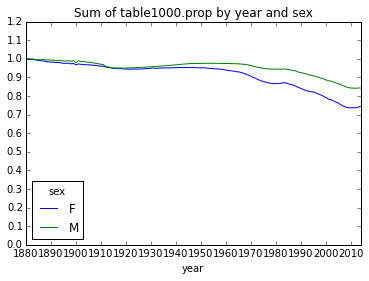

In [101]:
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

So it looks like diversity has been going up over time: as the years go by, the top 1000 names account for a smaller and smaller proportion of baby names.

Let's look at another measure of diversity: how many names account for the top 50% of all baby names?  This is tricky to do but perfectly possible with Pandas.  We'll build it up slowly.

Let's just take the top 1000 girl names in 1880:

In [102]:
top1000_girls_1880 = top1000[(top1000.year == 1880) & (top1000.sex == 'F')]
top1000_girls_1880.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

What we need to find is this: if we sort the names starting with the most common, at what point will the cumulative sum of `prop` reach or exceed 50%?

In [103]:
sorted_names = top1000_girls_1880.sort_index(by='prop', ascending=False)
sorted_names['cumprop'] = top1000_girls_1880.prop.cumsum()
sorted_names.head()

name sex  births  year      prop   cumprop
year sex                                                   
1880 F   0       Mary   F    7065  1880  0.077643  0.077643
         1       Anna   F    2604  1880  0.028618  0.106261
         2       Emma   F    2003  1880  0.022013  0.128274
         3  Elizabeth   F    1939  1880  0.021309  0.149583
         4     Minnie   F    1746  1880  0.019188  0.168771

We could either code up a method to scan the `cumprop` column or find a built-in one that will do the job.

**Ex 1.4.12 Write a method that takes `cumprop` as an array of numbers and finds the index of the first element where cumprop > 0.50**

As luck would have it, NumPy already has a method to do what we want: given a sorted list, `searchsorted(x)` returns the index of the first element greater than x:

In [104]:
np.searchsorted([0.05,0.10,0.15,0.20,0.25], 0.12)

2

In this case, if the vector above were a vector of cumulative fractions, we'd need to include the first 3 items (not the first 2) to cover 12% of the cases.

Let's put this all together into a function that we can apply to a DataFrame in a `groupby` operation:

In [105]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_index(by='prop', ascending=False)
    
    # float() to convert a 1-element
    return np.searchsorted(group.prop.cumsum().values, q) + 1

In [106]:
diversity = top1000.groupby(['year', 'sex']).agg(get_quantile_count)
diversity.head()

year  sex
1880  F      38
      M      14
1881  F      38
      M      14
1882  F      38
dtype: int64

The table above uses something called hierarchical indexing, where both `year` and `sex` together act as a label.  It's more natural to turn this into a 2D table.  We can do that with `unstack`.

In [107]:
diversity = diversity.unstack()
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


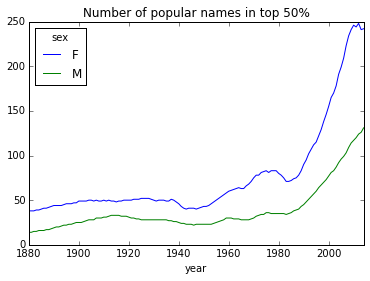

In [108]:
diversity.plot(title="Number of popular names in top 50%")

One final cute example: we can see how some names have changed switched genders over time!

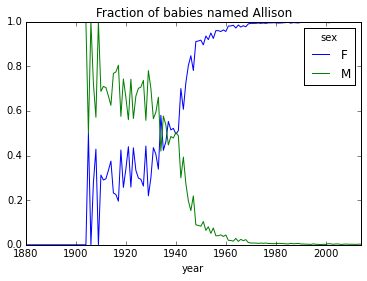

In [109]:
names_to_check = ['Allison', 'Alison']

# filter on just the names we're interested in
births = names[names.name.isin(names_to_check)]

# pivot table to get year vs. gender
births = births.pivot_table('births', index='year', columns='sex')

# fill all NaNs with zeros
births = births.fillna(0)

# normalize along columns
births = births.div(births.sum(1), axis=0)

births.plot(title='Fraction of babies named Allison');

**(!) Ex 1.4.13  As you can see above, some names have alternate spellings.  It's a tough problem to automatically group all "similar" names together.  A first step might be to find groups of names that start with the same 4 letters.  Find all such groups, listing the group with most variants first.**